In [72]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)
import pandas as pd
import sys
sys.path.append('../Libs/')
from FDcoeffs import *

7 points stencill, dl=0.1, prediction up to apdft7 grad apdft6 hessian. predicting gradients, hessians of the targets with their basis set, but at the geometry of the reference minimum.

In [2]:
bf_h=np.load("BF_hess_9pfd.npy")
co_h=np.load("CO_hess_9pfd.npy")
nn_h=np.load("NN_hess_9pfd.npy")
ch4_h=np.load("Ch4_hess_9pfd.npy")
bf_g=np.load("BF_grads_9pfd.npy")
co_g=np.load("CO_grads_9pfd.npy")
nn_g=np.load("NN_grads_9pfd.npy")
ch4_g=np.load("Ch4_grads_9pfd.npy")
bf_ad=np.load("BF_aderivs_9pfd.npy")
co_ad=np.load("CO_aderivs_9pfd.npy")
nn_ad=np.load("NN_aderivs_9pfd.npy")
ch4_ad=np.load("Ch4_aderivs_9pfd.npy")
dl=.1

In [3]:
tgs=pd.read_pickle("target_grad_hessian")

In [4]:
tgs

,gradient,hessian,molecule
0,-0.090365,0.403374,BH4
1,0.053638,0.303105,NH4
2,-0.267548,1.514365,BFatCO
3,0.120399,1.538942,NNatCO
4,0.259956,0.527085,COatBF
5,-0.119420,1.953081,COatNN


In [5]:
(.119420-.120964)/.119420

-0.012929157595042737

In [6]:
alt=pd.read_pickle("alch_transf_mol")
alt # this are gradients with basis set of the reference.

,alchemy,and1,and2,ge,grad,hess
0,CO@BF,-0.722169,0.180542,8.926402,-2.908639,0.530560
1,CO@NN,0.000000,0.246563,11.714076,-0.120964,1.948852
2,BF@CO,0.461071,0.230536,10.106888,-0.267220,1.509271
3,NN@CO,-0.461071,0.230536,11.417116,0.120866,1.543511


In [7]:
print("2 order finite diff. accuracy:: ",np.dot(fd1_2,co_g)/dl)
print("4 order finite diff. accuracy:: ",np.dot(fd1_4,co_g)/dl)
print("6 order finite diff. accuracy:: ",np.dot(fd1_6,co_g)/dl)
print("Analytical derivative        :: ",co_ad[4])

2 order finite diff. accuracy::  0.22423791603904064
4 order finite diff. accuracy::  0.22456112450318272
6 order finite diff. accuracy::  0.22456233571650233
Analytical derivative        ::  0.2245556800671315


In [8]:
print("2 order finite diff. accuracy:: ",np.dot(fd1_2,bf_g)/dl)
print("4 order finite diff. accuracy:: ",np.dot(fd1_4,bf_g)/dl)
print("6 order finite diff. accuracy:: ",np.dot(fd1_6,bf_g)/dl)
print("Analytical derivative        :: ",bf_ad[4])

2 order finite diff. accuracy::  0.26651297434510113
4 order finite diff. accuracy::  0.2667772914022537
6 order finite diff. accuracy::  0.2667768786438095
Analytical derivative        ::  0.26677746907369115


In [9]:
print("2 order finite diff. accuracy:: ",np.dot(fd1_2,ch4_g)/dl)
print("4 order finite diff. accuracy:: ",np.dot(fd1_4,ch4_g)/dl)
print("6 order finite diff. accuracy:: ",np.dot(fd1_6,ch4_g)/dl)
print("Analytical derivative        :: ",ch4_ad[4])

2 order finite diff. accuracy::  0.07884730081702318
4 order finite diff. accuracy::  0.07891979106868469
6 order finite diff. accuracy::  0.07891988016489244
Analytical derivative        ::  0.07891936579471134


In [10]:
tgs["molecule"]

0       BH4
1       NH4
2    BFatCO
3    NNatCO
4    COatBF
5    COatNN
Name: molecule, dtype: object

In [11]:
float(tgs[tgs.molecule=="BFatCO"].gradient)

-0.26754828296754773

In [12]:
aaff_predict=[]
tg=float(tgs[tgs.molecule=="BFatCO"].gradient)
aaff_predict.append(co_g[4])
aaff_predict.append(aaff_predict[0]-co_ad[4])
aaff_predict.append(aaff_predict[1]+np.sum(fd1_6*co_ad)/dl/2)
aaff_predict.append(aaff_predict[2]-np.sum(fd2_6*co_ad)/dl**2/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd3_4*co_ad)/dl**3/24 )
aaff_predict.append(aaff_predict[4]-np.sum(fd4_4*co_ad)/dl**4/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd5_2*co_ad)/dl**5/720)
aaff_predict.append(aaff_predict[6]-np.sum(fd6_2*co_ad)/dl**6/5040)
re_co_bf=(np.asarray(aaff_predict)-tg)/tg
np.asarray(aaff_predict),tg,re_co_bf

(array([ 2.68246142e-06, -2.24552998e-01, -3.03578795e-01, -2.71268132e-01,
        -2.64740053e-01, -2.66566980e-01, -2.67364425e-01, -2.67561310e-01]),
 -0.26754828296754773,
 array([-1.00001003e+00, -1.60701033e-01,  1.34669194e-01,  1.39034676e-02,
        -1.04961620e-02, -3.66776033e-03, -6.87196708e-04,  4.86919049e-05]))

In [13]:
aaff_predict=[]
tg=float(tgs[tgs.molecule=="BFatCO"].gradient)
aaff_predict.append(co_g[4])
aaff_predict.append(aaff_predict[0]-co_ad[4])
aaff_predict.append(aaff_predict[1]+np.sum(fd1_6*co_ad)/dl/2)
aaff_predict.append(aaff_predict[2]-np.sum(fd2_6*co_ad)/dl**2/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd3_4*co_ad)/dl**3/24 )
aaff_predict.append(aaff_predict[4]-np.sum(fd4_4*co_ad)/dl**4/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd5_2*co_ad)/dl**5/720)
aaff_predict.append(aaff_predict[6]-np.sum(fd6_2*co_ad)/dl**6/5040)
re_co_bf=(np.asarray(aaff_predict)-tg)/tg
np.asarray(aaff_predict),tg,re_co_bf

(array([ 2.68246142e-06, -2.24552998e-01, -3.03578795e-01, -2.71268132e-01,
        -2.64740053e-01, -2.66566980e-01, -2.67364425e-01, -2.67561310e-01]),
 -0.26754828296754773,
 array([-1.00001003e+00, -1.60701033e-01,  1.34669194e-01,  1.39034676e-02,
        -1.04961620e-02, -3.66776033e-03, -6.87196708e-04,  4.86919049e-05]))

In [14]:
aaff_predict=[]
tg=float(tgs[tgs.molecule=="NNatCO"].gradient)
aaff_predict.append(co_g[4])
aaff_predict.append(aaff_predict[0]+co_ad[4])
aaff_predict.append(aaff_predict[1]+np.sum(fd1_6*co_ad)/dl/2)
aaff_predict.append(aaff_predict[2]+np.sum(fd2_6*co_ad)/dl**2/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd3_4*co_ad)/dl**3/24 )
aaff_predict.append(aaff_predict[4]+np.sum(fd4_4*co_ad)/dl**4/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd5_2*co_ad)/dl**5/720)
aaff_predict.append(aaff_predict[6]+np.sum(fd6_2*co_ad)/dl**6/5040)
re_co_nn=(np.asarray(aaff_predict)-tg)/tg
np.asarray(aaff_predict),tg,re_co_nn

(array([2.68246142e-06, 2.24558363e-01, 1.45532566e-01, 1.13221903e-01,
        1.19749982e-01, 1.21576909e-01, 1.20779464e-01, 1.20976350e-01]),
 0.12039897206164873,
 array([-0.99997772,  0.8651186 ,  0.20875256, -0.05961072, -0.00539033,
         0.00978361,  0.00316026,  0.00479554]))

In [15]:
aaff_predict=[]
tg=float(tgs[tgs.molecule=="COatBF"].gradient)
aaff_predict.append(bf_g[4])
aaff_predict.append(aaff_predict[0]+bf_ad[4])
aaff_predict.append(aaff_predict[1]+np.sum(fd1_6*bf_ad)/dl/2)
aaff_predict.append(aaff_predict[2]+np.sum(fd2_6*bf_ad)/dl**2/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd3_4*bf_ad)/dl**3/24 )
aaff_predict.append(aaff_predict[4]+np.sum(fd4_4*bf_ad)/dl**4/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd5_2*bf_ad)/dl**5/720)
aaff_predict.append(aaff_predict[6]+np.sum(fd6_2*bf_ad)/dl**6/5040)
re_bf_co=(np.asarray(aaff_predict)-tg)/tg
np.asarray(aaff_predict),tg,re_bf_co

(array([-8.97146013e-07,  2.66776572e-01,  2.91375692e-01,  2.64998019e-01,
         2.60448694e-01,  2.59321836e-01,  2.59817997e-01,  2.60458263e-01]),
 0.2599559115472605,
 array([-1.00000345e+00,  2.62377583e-02,  1.20865806e-01,  1.93960106e-02,
         1.89563828e-03, -2.43916633e-03, -5.30530237e-04,  1.93244778e-03]))

In [16]:
aaff_predict=[]
tg=float(tgs[tgs.molecule=="COatNN"].gradient)
aaff_predict.append(nn_g[4])
aaff_predict.append(aaff_predict[0]+nn_ad[4])
aaff_predict.append(aaff_predict[1]+np.dot(fd1_6,nn_ad)/dl/2)
aaff_predict.append(aaff_predict[2]+np.dot(fd2_6,nn_ad)/dl**2/6)
aaff_predict.append(aaff_predict[3]+np.dot(fd3_4,nn_ad)/dl**3/24 )
aaff_predict.append(aaff_predict[4]+np.dot(fd4_4,nn_ad)/dl**4/120)
aaff_predict.append(aaff_predict[5]+np.dot(fd5_2,nn_ad)/dl**5/720)
aaff_predict.append(aaff_predict[6]+np.dot(fd6_2,nn_ad)/dl**6/5040)
re_nn_co=(np.asarray(aaff_predict)-tg)/tg
np.asarray(aaff_predict),re_nn_co,tg,(np.asarray(aaff_predict)+.120964)/.120964

(array([-8.83731441e-06, -8.83731420e-06, -1.29066506e-01, -1.29066506e-01,
        -1.21060501e-01, -1.21060501e-01, -1.20909300e-01, -1.20909300e-01]),
 array([-0.999926  , -0.999926  ,  0.0807764 ,  0.0807764 ,  0.01373576,
         0.01373576,  0.01246964,  0.01246964]),
 -0.11942017426455642,
 array([ 9.99926943e-01,  9.99926943e-01, -6.69827902e-02, -6.69827902e-02,
        -7.97763697e-04, -7.97763763e-04,  4.52196918e-04,  4.52197458e-04]))

In [17]:
aaff_predict=[]    # CH4->NH4
tg=float(tgs[tgs.molecule=="NH4"].gradient)
aaff_predict.append(ch4_g[4])
aaff_predict.append(aaff_predict[0]+ch4_ad[4])
aaff_predict.append(aaff_predict[1]+np.sum(fd1_6*ch4_ad)/dl/2)
aaff_predict.append(aaff_predict[2]+np.sum(fd2_6*ch4_ad)/dl**2/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd3_4*ch4_ad)/dl**3/24 )
aaff_predict.append(aaff_predict[4]+np.sum(fd4_4*ch4_ad)/dl**4/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd5_2*ch4_ad)/dl**5/720)
aaff_predict.append(aaff_predict[6]+np.sum(fd6_2*ch4_ad)/dl**6/5040)
re_ch4_nh4=(np.asarray(aaff_predict)-tg)/tg
np.asarray(aaff_predict),re_ch4_nh4,tg

(array([-8.74635934e-07,  7.89184912e-02,  5.98863777e-02,  5.26404950e-02,
         5.33803631e-02,  5.34978222e-02,  5.34851189e-02,  5.34035632e-02]),
 array([-1.00001631,  0.47132321,  0.11649648, -0.01859271, -0.00479892,
        -0.00260907, -0.0028459 , -0.00436639]),
 0.05363776666594178)

In [18]:
aaff_predict=[]    # CH4->BH4
tg=float(tgs[tgs.molecule=="BH4"].gradient)
aaff_predict.append(ch4_g[4])
aaff_predict.append(aaff_predict[0]-ch4_ad[4])
aaff_predict.append(aaff_predict[1]+np.sum(fd1_6*ch4_ad)/dl/2)
aaff_predict.append(aaff_predict[2]-np.sum(fd2_6*ch4_ad)/dl**2/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd3_4*ch4_ad)/dl**3/24 )
aaff_predict.append(aaff_predict[4]-np.sum(fd4_4*ch4_ad)/dl**4/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd5_2*ch4_ad)/dl**5/720)
aaff_predict.append(aaff_predict[6]-np.sum(fd6_2*ch4_ad)/dl**6/5040)
re_ch4_bh4=(np.asarray(aaff_predict)-tg)/tg
np.asarray(aaff_predict),re_ch4_bh4,tg

(array([-8.74635934e-07, -7.89202404e-02, -9.79523539e-02, -9.07064712e-02,
        -8.99666031e-02, -9.00840622e-02, -9.00967655e-02, -9.00152098e-02]),
 array([-0.99999032, -0.12664763,  0.0839668 ,  0.00378194, -0.00440564,
        -0.00310581, -0.00296523, -0.00386775]),
 -0.09036471758108888)

# Taylor expansion of the Hessian

In [19]:
aaff_predict=[]
th=float(tgs[tgs.molecule=="COatBF"].hessian)
aaff_predict.append(bf_h[4])
aaff_predict.append(aaff_predict[0]+np.sum(fd1_6*bf_h)/dl)
aaff_predict.append(aaff_predict[1]+np.sum(fd2_6*bf_h)/dl**2/2)
aaff_predict.append(aaff_predict[2]+np.sum(fd3_4*bf_h)/dl**3/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd4_4*bf_h)/dl**4/24 )
aaff_predict.append(aaff_predict[4]+np.sum(fd5_2*bf_h)/dl**5/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd6_2*bf_h)/dl**6/720)
Hre_bf_co=((np.asarray(aaff_predict)-th)/th)
np.asarray(aaff_predict),Hre_bf_co,th

(array([0.59158882, 0.53805439, 0.51945072, 0.52180401, 0.53188403,
        0.5347747 , 0.53124212]),
 array([ 0.12237837,  0.02081139, -0.01448399, -0.01001927,  0.00910483,
         0.01458907,  0.00788697]),
 0.5270850155450217)

In [20]:
aaff_predict=[]
th=float(tgs[tgs.molecule=="BFatCO"].hessian)
aaff_predict.append(co_h[4])
aaff_predict.append(aaff_predict[0]-np.sum(fd1_6*co_h)/dl)
aaff_predict.append(aaff_predict[1]+np.sum(fd2_6*co_h)/dl**2/2)
aaff_predict.append(aaff_predict[2]-np.sum(fd3_4*co_h)/dl**3/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd4_4*co_h)/dl**4/24 )
aaff_predict.append(aaff_predict[4]-np.sum(fd5_2*co_h)/dl**5/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd6_2*co_h)/dl**6/720)
Hre_co_bf=((np.asarray(aaff_predict)-th)/th)
np.asarray(aaff_predict),Hre_co_bf,th

(array([1.53201985, 1.51033602, 1.50374295, 1.51016647, 1.51560858,
        1.51477693, 1.48964454]),
 array([ 0.01165797, -0.00266079, -0.00701447, -0.00277275,  0.0008209 ,
         0.00027173, -0.01632426]),
 1.5143654274925282)

In [21]:
aaff_predict=[]
th=float(tgs[tgs.molecule=="NNatCO"].hessian)
aaff_predict.append(co_h[4])
aaff_predict.append(aaff_predict[0]+np.sum(fd1_6*co_h)/dl)
aaff_predict.append(aaff_predict[1]+np.sum(fd2_6*co_h)/dl**2/2)
aaff_predict.append(aaff_predict[2]+np.sum(fd3_4*co_h)/dl**3/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd4_4*co_h)/dl**4/24 )
aaff_predict.append(aaff_predict[4]+np.sum(fd5_2*co_h)/dl**5/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd6_2*co_h)/dl**6/720)
Hre_co_nn=((np.asarray(aaff_predict)-th)/th)
np.asarray(aaff_predict),Hre_co_nn,th

(array([1.53201985, 1.55370369, 1.54711063, 1.54068711, 1.54612922,
        1.54696087, 1.52182848]),
 array([-0.00449825,  0.00959184,  0.00530769,  0.00113371,  0.00466997,
         0.00521037, -0.01112057]),
 1.5389424031892336)

In [22]:
aaff_predict=[]
th=float(tgs[tgs.molecule=="COatNN"].hessian)
aaff_predict.append(nn_h[4])
aaff_predict.append(aaff_predict[0]+np.sum(fd1_6*nn_h)/dl)
aaff_predict.append(aaff_predict[1]+np.sum(fd2_6*nn_h)/dl**2/2)
aaff_predict.append(aaff_predict[2]+np.sum(fd3_4*nn_h)/dl**3/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd4_4*nn_h)/dl**4/24 )
aaff_predict.append(aaff_predict[4]+np.sum(fd5_2*nn_h)/dl**5/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd6_2*nn_h)/dl**6/720)
Hre_nn_co=((np.asarray(aaff_predict)-th)/th)
np.asarray(aaff_predict),Hre_nn_co,th

(array([1.97525265, 1.97525265, 1.94815702, 1.94815702, 1.94827178,
        1.94827178, 1.94897558]),
 array([ 0.01135218,  0.01135218, -0.00252109, -0.00252109, -0.00246233,
        -0.00246233, -0.00210198]),
 1.9530809144415002)

In [23]:
aaff_predict=[]  #CH4->NH4
th=float(tgs[tgs.molecule=="NH4"].hessian)
aaff_predict.append(ch4_h[4])
aaff_predict.append(aaff_predict[0]+np.sum(fd1_6*ch4_h)/dl)
aaff_predict.append(aaff_predict[1]+np.sum(fd2_6*ch4_h)/dl**2/2)
aaff_predict.append(aaff_predict[2]+np.sum(fd3_4*ch4_h)/dl**3/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd4_4*ch4_h)/dl**4/24 )
aaff_predict.append(aaff_predict[4]+np.sum(fd5_2*ch4_h)/dl**5/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd6_2*ch4_h)/dl**6/720)
Hre_ch4_nh4=((np.asarray(aaff_predict)-th)/th)
np.asarray(aaff_predict),Hre_ch4_nh4,th

(array([0.36877375, 0.31934614, 0.30399456, 0.30353463, 0.30328224,
        0.30337041, 0.30408902]),
 array([0.21665279, 0.05358196, 0.00293427, 0.00141688, 0.00058419,
        0.00087507, 0.00324592]),
 0.3031051665449356)

In [24]:
aaff_predict=[]   #CH4->BH4
th=float(tgs[tgs.molecule=="BH4"].hessian)
aaff_predict.append(ch4_h[4])
aaff_predict.append(aaff_predict[0]-np.sum(fd1_6*ch4_h)/dl)
aaff_predict.append(aaff_predict[1]+np.sum(fd2_6*ch4_h)/dl**2/2)
aaff_predict.append(aaff_predict[2]-np.sum(fd3_4*ch4_h)/dl**3/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd4_4*ch4_h)/dl**4/24 )
aaff_predict.append(aaff_predict[4]-np.sum(fd5_2*ch4_h)/dl**5/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd6_2*ch4_h)/dl**6/720)
Hre_ch4_bh4=((np.asarray(aaff_predict)-th)/th)
np.asarray(aaff_predict),Hre_ch4_bh4,th

(array([0.36877375, 0.41820135, 0.40284977, 0.4033097 , 0.40305731,
        0.40296914, 0.40368776]),
 array([-0.08577632,  0.03675922, -0.00129874, -0.00015854, -0.00078424,
        -0.00100282,  0.0007787 ]),
 0.4033736521752618)

In [32]:
import matplotlib.ticker as mtick

re_co_bf

array([-1.00001003e+00, -1.60701033e-01,  1.34669194e-01,  1.39034676e-02,
       -1.04961620e-02, -3.66776033e-03, -6.87196708e-04,  4.86919049e-05])

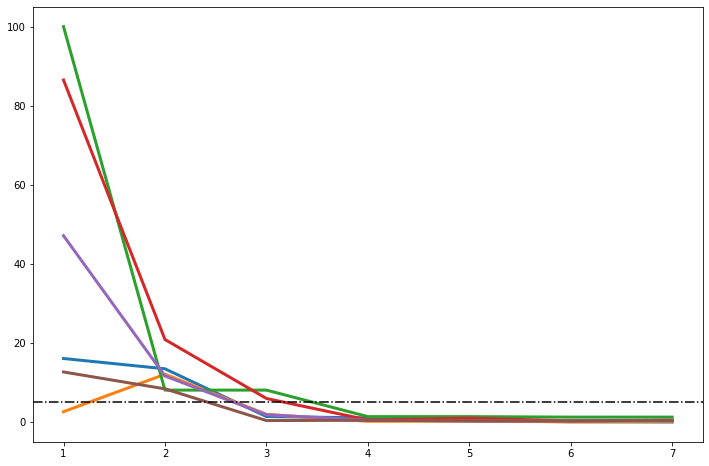

In [35]:
plt.figure(figsize=(12,8))
plt.plot(range(1,pr),100*abs(re_co_bf[1:pr]),label="CO$\longrightarrow$BF",lw=3)
plt.plot(range(1,pr),100*abs(re_bf_co[1:pr]),label="BF$\longrightarrow$CO",lw=3)
plt.plot(range(1,pr),100*abs(re_nn_co[1:pr]),label="NN$\longrightarrow$CO",lw=3)
plt.plot(range(1,pr),100*abs(re_co_nn[1:pr]),label="CO$\longrightarrow$NN",lw=3)
plt.plot(range(1,pr),100*abs(re_ch4_nh4[1:pr]),label="CH$_4\longrightarrow$NH$_4^+$",lw=3)
plt.plot(range(1,pr),100*abs(re_ch4_bh4[1:pr]),label="CH$_4\longrightarrow$BH$_4^-$",lw=3)
plt.axhline(5,ls='-.',lw=1.5,color='black')

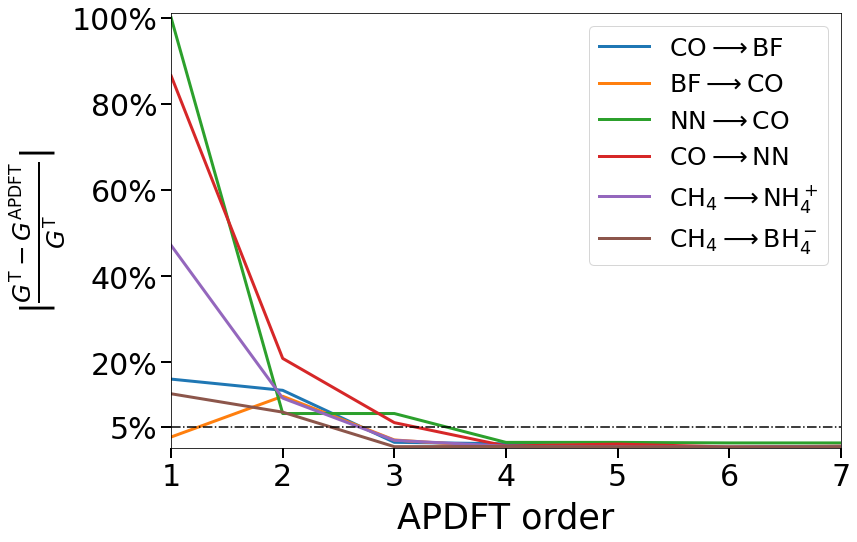

In [60]:
pr=8
plt.figure(figsize=(12,8))
plt.axes().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.plot(range(1,pr),100*abs(re_co_bf[1:pr]),label="CO$\longrightarrow$BF",lw=3)
plt.plot(range(1,pr),100*abs(re_bf_co[1:pr]),label="BF$\longrightarrow$CO",lw=3)
plt.plot(range(1,pr),100*abs(re_nn_co[1:pr]),label="NN$\longrightarrow$CO",lw=3)
plt.plot(range(1,pr),100*abs(re_co_nn[1:pr]),label="CO$\longrightarrow$NN",lw=3)
plt.plot(range(1,pr),100*abs(re_ch4_nh4[1:pr]),label="CH$_4\longrightarrow$NH$_4^+$",lw=3)
plt.plot(range(1,pr),100*abs(re_ch4_bh4[1:pr]),label="CH$_4\longrightarrow$BH$_4^-$",lw=3)
plt.axhline(5,ls='-.',lw=1.5,color='black')


plt.legend(fontsize=25)

plt.xlim(1,7)
plt.ylim(0,101)
#plt.title("Percent error in Gradient predictions",size=35,pad=20)
plt.xlabel("APDFT order",size=35,labelpad=10)
plt.ylabel("$ \\vert \\frac{G^\\mathrm{T}-G^{\\mathrm{APDFT}}}{G^\\mathrm{T}}  \\vert$",size=35)


plt.tick_params(length=10,width=2.)
plt.yticks([5,20,40,60,80,100],size=30)
plt.xticks(size=30)

plt.savefig("error_gradients.png",bbox_inches='tight')

AttributeError: 'tuple' object has no attribute 'yaxis'

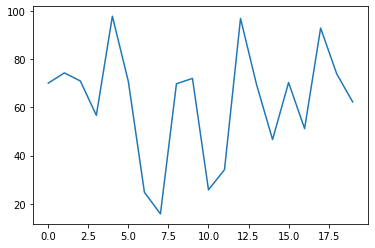

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

# Use automatic StrMethodFormatter
plt.yaxis.set_major_formatter('${x:1.2f}')

plt.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=False, labelright=True)

plt.show()


In [44]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '_IoffContext',
 '_IonContext',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_copy_docstring_and_deprecators',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setup

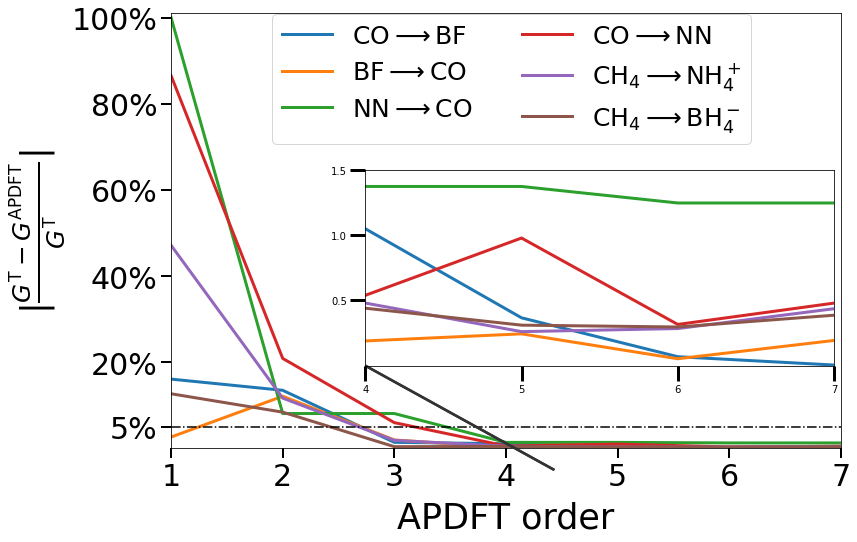

In [150]:
pr=8
fig=plt.figure(figsize=(12,8))
plt.axes().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.plot(range(1,pr),100*abs(re_co_bf[1:pr]),label="CO$\longrightarrow$BF",lw=3)
plt.plot(range(1,pr),100*abs(re_bf_co[1:pr]),label="BF$\longrightarrow$CO",lw=3)
plt.plot(range(1,pr),100*abs(re_nn_co[1:pr]),label="NN$\longrightarrow$CO",lw=3)
plt.plot(range(1,pr),100*abs(re_co_nn[1:pr]),label="CO$\longrightarrow$NN",lw=3)
plt.plot(range(1,pr),100*abs(re_ch4_nh4[1:pr]),label="CH$_4\longrightarrow$NH$_4^+$",lw=3)
plt.plot(range(1,pr),100*abs(re_ch4_bh4[1:pr]),label="CH$_4\longrightarrow$BH$_4^-$",lw=3)
plt.axhline(5,ls='-.',lw=1.5,color='black')
plt.legend(fontsize=25,ncol=2,loc=(.15,.7))

plt.xlim(1,7)
plt.ylim(0,101)
#plt.title("Percent error in Gradient predictions",size=35,pad=20)
plt.xlabel("APDFT order",size=35,labelpad=10)
plt.ylabel("$ \\vert \\frac{G^\\mathrm{T}-G^{\\mathrm{APDFT}}}{G^\\mathrm{T}}  \\vert$",size=35)


plt.tick_params(length=10,width=2.)
plt.yticks([5,20,40,60,80,100],size=30)
plt.xticks(size=30)

###################################

ax2 = plt.axes([0,4,1,6])
ip = InsetPosition(ax1, [0.29,0.19,0.7,0.45])
ax2.set_axes_locator(ip)

#plt.yscale("log")
ax2.plot(range(4,pr),100*abs(re_co_bf[4:pr]),label="CO$\longrightarrow$BF",lw=3)
ax2.plot(range(4,pr),100*abs(re_bf_co[4:pr]),label="BF$\longrightarrow$CO",lw=3)
ax2.plot(range(4,pr),100*abs(re_nn_co[4:pr]),label="NN$\longrightarrow$CO",lw=3)
ax2.plot(range(4,pr),100*abs(re_co_nn[4:pr]),label="CO$\longrightarrow$NN",lw=3)
ax2.plot(range(4,pr),100*abs(re_ch4_nh4[4:pr]),label="CH$_4\longrightarrow$NH$_4^+$",lw=3)
ax2.plot(range(4,pr),100*abs(re_ch4_bh4[4:pr]),label="CH$_4\longrightarrow$BH$_4^-$",lw=3)
ax2.tick_params(length=15,width=3.)
ax2.set_yticks([.5,1,1.5],size=30)
ax2.set_xticks([4,5,6,7],size=30)
ax2.set_yticks([.5,1,1.5],size=30)
ax2.set_xticks([4,5,6,7],size=30)

ax2.set_xlim(4,7)
ax2.set_ylim(0,1.5)
mark_inset(ax1 , ax2, loc1=3, loc2=3, fc="none", ec='0.2',lw=2.5)

plt.savefig("error_gradients.png",bbox_inches='tight')

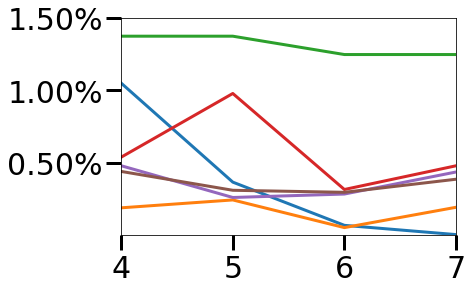

In [62]:
pr=8
#plt.yscale("log")
plt.axes().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.plot(range(4,pr),100*abs(re_co_bf[4:pr]),label="CO$\longrightarrow$BF",lw=3)
plt.plot(range(4,pr),100*abs(re_bf_co[4:pr]),label="BF$\longrightarrow$CO",lw=3)
plt.plot(range(4,pr),100*abs(re_nn_co[4:pr]),label="NN$\longrightarrow$CO",lw=3)
plt.plot(range(4,pr),100*abs(re_co_nn[4:pr]),label="CO$\longrightarrow$NN",lw=3)
plt.plot(range(4,pr),100*abs(re_ch4_nh4[4:pr]),label="CH$_4\longrightarrow$NH$_4^+$",lw=3)
plt.plot(range(4,pr),100*abs(re_ch4_bh4[4:pr]),label="CH$_4\longrightarrow$BH$_4^-$",lw=3)
plt.tick_params(length=15,width=3.)
plt.yticks([.5,1,1.5],size=30)
plt.xticks([4,5,6,7],size=30)
plt.xlim(4,7)
plt.ylim(0,1.5)
plt.savefig("subplot.png",bbox_inches="tight")

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7fd4d0afa908>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7fd4d0afad68>)

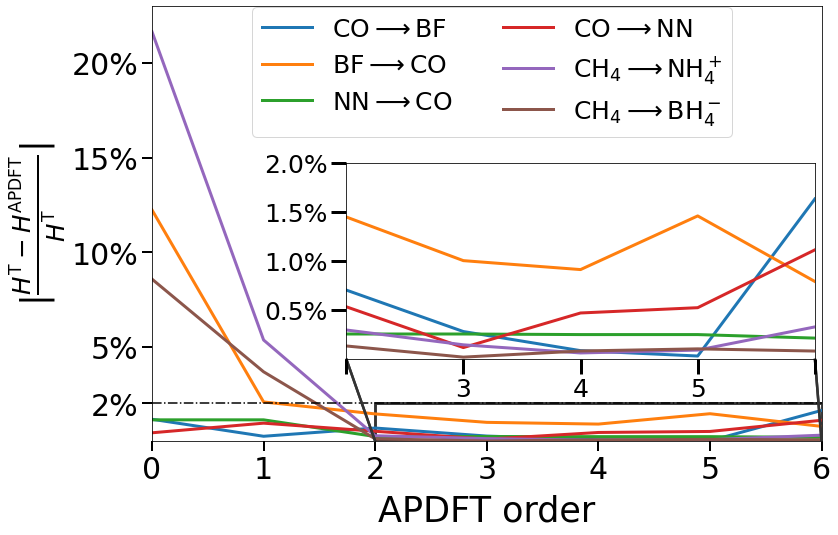

In [141]:
pr=7
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.plot(range(pr),100*abs(Hre_co_bf[:pr]),label="CO$\longrightarrow$BF",lw=3)
plt.plot(range(pr),100*abs(Hre_bf_co[:pr]),label="BF$\longrightarrow$CO",lw=3)
plt.plot(range(pr),100*abs(Hre_nn_co[:pr]),label="NN$\longrightarrow$CO",lw=3)
plt.plot(range(pr),100*abs(Hre_co_nn[:pr]),label="CO$\longrightarrow$NN",lw=3)
plt.plot(range(pr),100*abs(Hre_ch4_nh4[:pr]),label="CH$_4\longrightarrow$NH$_4^+$",lw=3)
plt.plot(range(pr),100*abs(Hre_ch4_bh4[:pr]),label="CH$_4\longrightarrow$BH$_4^-$",lw=3)
plt.axhline(2,lw=1.5,ls="-.",color='black')
plt.legend(fontsize=25,ncol=2,loc=(.15,.7))
plt.xlim(0,6)
plt.ylim(0,23)
#plt.title("Percent error in Hessian predictions",size=35,pad=20)
plt.xlabel("APDFT order",size=35,labelpad=10)
plt.ylabel("$ \\vert \\frac{H^\\mathrm{T}-H^{\\mathrm{APDFT}}}{H^\\mathrm{T}}  \\vert$",size=35)

plt.tick_params(length=10,width=2.)
plt.yticks([2 , 5, 10, 15, 20],size=25)
ax1.set_yticklabels(["2%" , "5%", "10%", "15%", "20%"],fontsize=30)

plt.xticks(size=30)



ax2 = plt.axes([0,4,1,6])

ip = InsetPosition(ax1, [0.29,0.19,0.7,0.45])
ax2.set_axes_locator(ip)

ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.plot(range(2,pr),100*abs(Hre_co_bf[2:pr]),label="CO$\longrightarrow$BF",lw=3)
ax2.plot(range(2,pr),100*abs(Hre_bf_co[2:pr]),label="BF$\longrightarrow$CO",lw=3)
ax2.plot(range(2,pr),100*abs(Hre_nn_co[2:pr]),label="NN$\longrightarrow$CO",lw=3)
ax2.plot(range(2,pr),100*abs(Hre_co_nn[2:pr]),label="CO$\longrightarrow$NN",lw=3)
ax2.plot(range(2,pr),100*abs(Hre_ch4_nh4[2:pr]),label="CH$_4\longrightarrow$NH$_4^+$",lw=3)
ax2.plot(range(2,pr),100*abs(Hre_ch4_bh4[2:pr]),label="CH$_4\longrightarrow$BH$_4^-$",lw=3)
ax2.tick_params(length=15,width=3.)
ax2.set_yticks([.5,1,1.5,2],size=20)
ax2.set_xticks([2,3,4,5,6],size=20)


ax2.set_yticklabels([str(x)+"%" for x in [.5,1.0,1.5,2.0]],fontsize=25)
ax2.set_xticklabels(["","3","4","5",""],fontsize=25)

ax2.set_xlim(2,pr-1)
ax2.set_ylim(0,2)


mark_inset(ax1 , ax2, loc1=3, loc2=3, fc="none", ec='0.2',lw=2.5)


#plt.savefig("error_hessian.png",bbox_inches='tight')

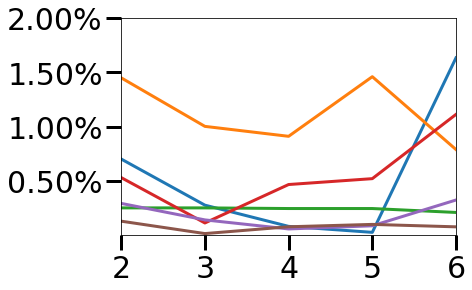

In [64]:
pr=7
plt.axes().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.plot(range(2,pr),100*abs(Hre_co_bf[2:pr]),label="CO$\longrightarrow$BF",lw=3)
plt.plot(range(2,pr),100*abs(Hre_bf_co[2:pr]),label="BF$\longrightarrow$CO",lw=3)
plt.plot(range(2,pr),100*abs(Hre_nn_co[2:pr]),label="NN$\longrightarrow$CO",lw=3)
plt.plot(range(2,pr),100*abs(Hre_co_nn[2:pr]),label="CO$\longrightarrow$NN",lw=3)
plt.plot(range(2,pr),100*abs(Hre_ch4_nh4[2:pr]),label="CH$_4\longrightarrow$NH$_4^+$",lw=3)
plt.plot(range(2,pr),100*abs(Hre_ch4_bh4[2:pr]),label="CH$_4\longrightarrow$BH$_4^-$",lw=3)
plt.tick_params(length=15,width=3.)
plt.yticks([.5,1,1.5,2],size=30)
plt.xticks([2,3,4,5,6],size=30)
plt.xlim(2,pr-1)
plt.ylim(0,2)
plt.savefig("subplot_hess.png",bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/administrator/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


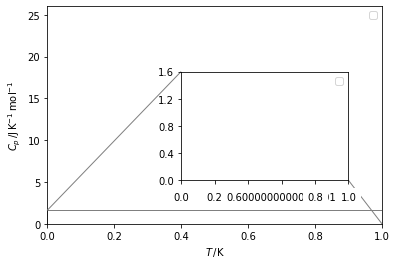

In [71]:

fig, ax1 = plt.subplots()

ax1.set_xlabel(r'$T\,/\mathrm{K}$')
ax1.set_ylabel(r'$C_p\,/\mathrm{J\,K^{-1}\,mol^{-1}}$')
ax1.legend(loc=0)

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.4,0.2,0.5,0.5])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')

# The data: only display for low temperature in the inset figure.
ax2.legend(loc=0)

# Some ad hoc tweaks.
ax1.set_ylim(0,26)
ax2.set_yticks(np.arange(0,2,0.4))
ax2.set_xticklabels(ax2.get_xticks(), backgroundcolor='w')
ax2.tick_params(axis='x', which='major', pad=8)

plt.show()
